In [363]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from loguru import logger
import os

# OCR Only

In [364]:
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_ocr_only.csv"

# Read the CSV file
df_standard_ocr_only = pd.read_csv(filename)
print(df_standard_ocr_only)

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment
                                               Prompt  GT_Keyframe  Top_1  \
0                                   learning outcomes            3     32   
1    What are the learning outcomes from the lecture?            3     85   
2        What is the relation of protien and muscles?           26     27   
3                               Essential fatty acids           29     29   
4                                   fish oil capsules           30     30   
5   what is the functioning of fish oil capsules a...           30     30   
6                            calcium as micronutrient           46     46   
7        Explain where vitamins function as coenzymes           41     41   
8   Give a list of food items where I can attain s...           45     42   
9           what is calcium commonly supplemented for           46     46   
10       How are nutrients extracted from plant cells           50     50   
11   

In [365]:
def calculate_and_plot_gt_keyframe_percentage(data):
    # Convert data to a DataFrame
    df = pd.DataFrame(data)

    # Plotting
    plt.figure(figsize=(10, 6))

    total = len(df)
    top_1_count = 0
    top_2_count = 0
    top_3_count = 0

    # Iterate through the DataFrame to count the occurrences
    for index, row in df.iterrows():
        if row['GT_Keyframe'] == row['Top_1']:
            top_1_count += 1
        elif row['GT_Keyframe'] == row['Top_2']:
            top_2_count += 1
        elif row['GT_Keyframe'] == row['Top_3']:
            top_3_count += 1

    # Calculate percentages
    top_1_percentage = (top_1_count / total) * 100
    top_2_percentage = (top_2_count / total) * 100
    top_3_percentage = (top_3_count / total) * 100

    # Print the results
    print(f"GT_Keyframe in Top 1: {top_1_percentage:.2f}%")
    print(f"GT_Keyframe in Top 2: {top_2_percentage:.2f}%")
    print(f"GT_Keyframe in Top 3: {top_3_percentage:.2f}%")

    # Data for plotting
    labels = ['Top 1', 'Top 2', 'Top 3']
    percentages = [top_1_percentage, top_2_percentage, top_3_percentage]

    # Create the plot
    plt.figure(figsize=(8, 5))
    plt.bar(labels, percentages, color=['blue', 'green', 'red'])
    plt.xlabel('Position')
    plt.ylabel('Percentage')
    plt.title('Percentage of GT_Keyframe in Top Positions \n (OCR Only)')
    plt.ylim(0, 100)


def total_top_3_percentage_plot(data_1, data_2, data_3, data_4, prox_1, prox_2, prox_3, prox_4):
    def calculate_top_3_percentages(df):
        total = len(df)
        top_1_count = (df['GT_Keyframe'] == df['Top_1']).sum()
        top_2_count = (df['GT_Keyframe'] == df['Top_2']).sum()
        top_3_count = (df['GT_Keyframe'] == df['Top_3']).sum()

        top_1_percentage = (top_1_count / total) * 100
        top_2_percentage = (top_2_count / total) * 100
        top_3_percentage = (top_3_count / total) * 100

        return top_1_percentage, top_2_percentage, top_3_percentage
    def count(data):
        count_greater_than_zero = sum(1 for x in data if x > 0)
    
        # Calculate the total number of elements
        total_elements = len(data)
        
        # Calculate the percentage
        percentage = (count_greater_than_zero / total_elements) * 100
        
        return percentage
    
    c_prox_1 = count(prox_1)
    c_prox_2 = count(prox_2)
    c_prox_3 = count(prox_3)
    c_prox_4 = count(prox_4)
    
    
    # Convert data to DataFrames
    df1 = pd.DataFrame(data_1)
    df2 = pd.DataFrame(data_2)
    df3 = pd.DataFrame(data_3)
    df4 = pd.DataFrame(data_4)

    # Calculate percentages for each DataFrame
    percentages_1 = calculate_top_3_percentages(df1)
    percentages_2 = calculate_top_3_percentages(df2)
    percentages_3 = calculate_top_3_percentages(df3)
    percentages_4 = calculate_top_3_percentages(df4)

    total_1 = sum(percentages_1)
    total_2 = sum(percentages_2)
    total_3 = sum(percentages_3)
    total_4 = sum(percentages_4)

    # Data for plotting
    labels = ['OCR Only', 'OCR + LLaVa', 'OCR + Transcriptions', 'Extensive Summary']
    percentages_group1 = [total_1, total_2, total_3, total_4]
    percentages_group2 = [c_prox_1, c_prox_2, c_prox_3, c_prox_4]

    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of the bars

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))

    bars1 = ax.bar(x - width / 2, percentages_group1, width, label='Keyframe in Top 3 Positions', color='blue')
    bars2 = ax.bar(x + width / 2, percentages_group2, width, label='Keyframe in Proximity Set', color='green')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Biology Lecture')
    ax.set_ylabel('Percentage')
    ax.set_title('Total Percentage of Extracted Keyframes to GT')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    # Save the plot
    plt.savefig('total_top_3_percentage_plot_bar_biology.png')
    # Show the plot
    plt.show()


#hard coded
img_paths = 150


def check_proximity_keyframes(gt):
    proximity_kf = []

    # Define the boundaries for the image paths
    max_index = img_paths - 1

    if gt == 0:
        logger.info("No proximity - Invalid GT")
    elif gt == 1:
        proximity_kf.extend(range(1, 5))
    elif gt >= max_index:
        proximity_kf.extend(range(max_index, max_index - 5, -1))
    else:
        proximity_kf.extend([gt - 2, gt - 1, gt, gt + 1, gt + 2])

    # Ensure all indexes are within valid range
    proximity_kf = [i for i in proximity_kf if 0 <= i <= max_index]

    return proximity_kf



GT_Keyframe in Top 1: 45.45%
GT_Keyframe in Top 2: 22.73%
GT_Keyframe in Top 3: 0.00%


<Figure size 1000x600 with 0 Axes>

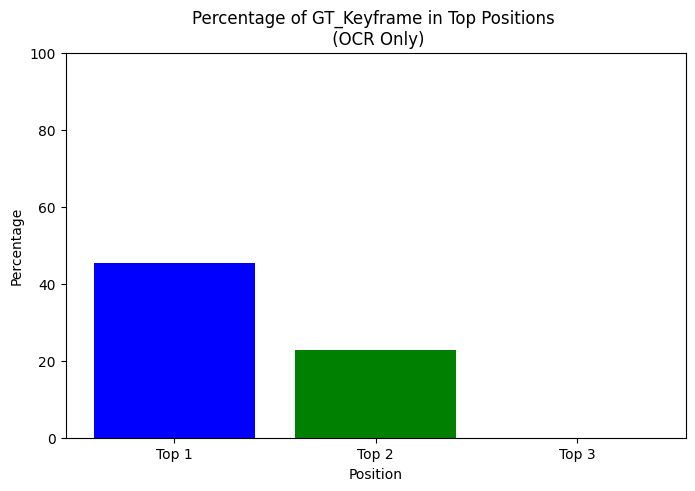

In [366]:
# call
calculate_and_plot_gt_keyframe_percentage(df_standard_ocr_only)

In [367]:
# iterate through data frame 
df = df_standard_ocr_only
res = []
for _, row in df.iterrows():
    logger.info(row['Prompt'])
    gt_keyframe = row['GT_Keyframe']
    prox = check_proximity_keyframes(gt_keyframe)
    res.append(prox)

prox_yes_no_ocr_only = []
for i, row in df.iterrows():
    if row['Top_1'] in res[i]:
        prox_yes_no_ocr_only.append(1)
    elif row['Top_2'] in res[i]:
        prox_yes_no_ocr_only.append(2)
    elif row['Top_3'] in res[i]:
        prox_yes_no_ocr_only.append(3)
    else:
        prox_yes_no_ocr_only.append(0)

print(prox_yes_no_ocr_only)
print(len(prox_yes_no_ocr_only))

2024-07-14 17:54:41.166 | INFO     | __main__:<module>:5 - learning outcomes
2024-07-14 17:54:41.166 | INFO     | __main__:<module>:5 - What are the learning outcomes from the lecture?
2024-07-14 17:54:41.170 | INFO     | __main__:<module>:5 - What is the relation of protien and muscles?
2024-07-14 17:54:41.171 | INFO     | __main__:<module>:5 - Essential fatty acids
2024-07-14 17:54:41.172 | INFO     | __main__:<module>:5 - fish oil capsules
2024-07-14 17:54:41.173 | INFO     | __main__:<module>:5 - what is the functioning of fish oil capsules and its relation to vitamins
2024-07-14 17:54:41.175 | INFO     | __main__:<module>:5 - calcium as micronutrient
2024-07-14 17:54:41.176 | INFO     | __main__:<module>:5 - Explain where vitamins function as coenzymes
2024-07-14 17:54:41.177 | INFO     | __main__:<module>:5 - Give a list of food items where I can attain some important micronutrient
2024-07-14 17:54:41.178 | INFO     | __main__:<module>:5 - what is calcium commonly supplemented fo

[2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2]
22


# OCR LAVA

In [368]:
# read data from csv file
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_ocr_lava.csv"
df_ocr_lava = pd.read_csv(filename)
df_ocr_lava.head()

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment


,Prompt,GT_Keyframe,Top_1,Top_2,Top_3
0,learning outcomes,3,3,85,6
1,What are the learning outcomes from the lecture?,3,45,3,85
2,What is the relation of protien and muscles?,26,27,65,23
3,Essential fatty acids,29,29,23,38
4,fish oil capsules,30,30,29,4


GT_Keyframe in Top 1: 50.00%
GT_Keyframe in Top 2: 4.55%
GT_Keyframe in Top 3: 13.64%


<Figure size 1000x600 with 0 Axes>

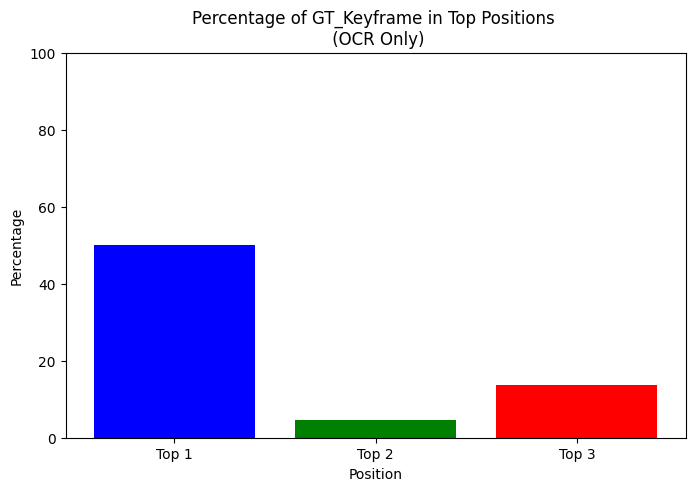

In [369]:
# call
calculate_and_plot_gt_keyframe_percentage(df_ocr_lava)

In [370]:
# iterate through data frame 
df = df_ocr_lava
# iterate through data frame 
res = []
for _, row in df.iterrows():
    logger.info(row['Prompt'])
    gt_keyframe = row['GT_Keyframe']
    prox = check_proximity_keyframes(gt_keyframe)
    res.append(prox)

prox_yes_no_ocr_lava = []
for i, row in df.iterrows():
    if row['Top_1'] in res[i]:
        prox_yes_no_ocr_lava.append(1)
    elif row['Top_2'] in res[i]:
        prox_yes_no_ocr_lava.append(2)
    elif row['Top_3'] in res[i]:
        prox_yes_no_ocr_lava.append(3)
    else:
        prox_yes_no_ocr_lava.append(0)

print(prox_yes_no_ocr_lava)

2024-07-14 17:54:41.422 | INFO     | __main__:<module>:6 - learning outcomes
2024-07-14 17:54:41.422 | INFO     | __main__:<module>:6 - What are the learning outcomes from the lecture?
2024-07-14 17:54:41.422 | INFO     | __main__:<module>:6 - What is the relation of protien and muscles?
2024-07-14 17:54:41.422 | INFO     | __main__:<module>:6 - Essential fatty acids
2024-07-14 17:54:41.435 | INFO     | __main__:<module>:6 - fish oil capsules
2024-07-14 17:54:41.435 | INFO     | __main__:<module>:6 - what is the functioning of fish oil capsules and its relation to vitamins
2024-07-14 17:54:41.435 | INFO     | __main__:<module>:6 - calcium as micronutrient
2024-07-14 17:54:41.435 | INFO     | __main__:<module>:6 - Explain where vitamins function as coenzymes
2024-07-14 17:54:41.435 | INFO     | __main__:<module>:6 - Give a list of food items where I can attain some important micronutrient
2024-07-14 17:54:41.435 | INFO     | __main__:<module>:6 - what is calcium commonly supplemented fo

[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1, 3]


# LLM Long Summary

In [371]:
# read data from csv file
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_llm_long_summary.csv"
df_long_summary = pd.read_csv(filename)
df_long_summary.head()

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment


,Prompt,GT_Keyframe,Top_1,Top_2,Top_3
0,learning outcomes,3,85,3,4
1,What are the learning outcomes from the lecture?,3,85,3,1
2,What is the relation of protien and muscles?,26,24,65,27
3,Essential fatty acids,29,29,28,37
4,fish oil capsules,30,30,34,29


GT_Keyframe in Top 1: 45.45%
GT_Keyframe in Top 2: 18.18%
GT_Keyframe in Top 3: 9.09%


<Figure size 1000x600 with 0 Axes>

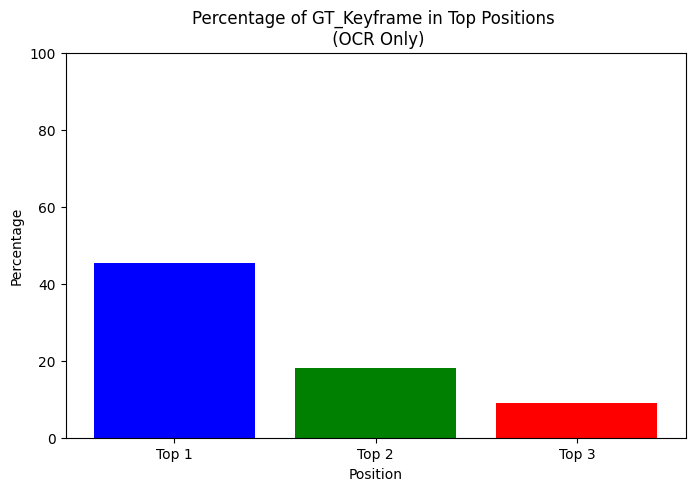

In [372]:
# call
calculate_and_plot_gt_keyframe_percentage(df_long_summary)

In [373]:
# iterate through data frame 
df = df_long_summary
res = []
for _, row in df.iterrows():
    logger.info(row['Prompt'])
    gt_keyframe = row['GT_Keyframe']
    prox = check_proximity_keyframes(gt_keyframe)
    res.append(prox)

prox_yes_no_long_summary = []
for i, row in df.iterrows():
    if row['Top_1'] in res[i]:
        prox_yes_no_long_summary.append(1)
    elif row['Top_2'] in res[i]:
        prox_yes_no_long_summary.append(2)
    elif row['Top_3'] in res[i]:
        prox_yes_no_long_summary.append(3)
    else:
        prox_yes_no_long_summary.append(0)

print(prox_yes_no_long_summary)

2024-07-14 17:54:41.685 | INFO     | __main__:<module>:5 - learning outcomes
2024-07-14 17:54:41.687 | INFO     | __main__:<module>:5 - What are the learning outcomes from the lecture?
2024-07-14 17:54:41.689 | INFO     | __main__:<module>:5 - What is the relation of protien and muscles?
2024-07-14 17:54:41.691 | INFO     | __main__:<module>:5 - Essential fatty acids
2024-07-14 17:54:41.692 | INFO     | __main__:<module>:5 - fish oil capsules
2024-07-14 17:54:41.693 | INFO     | __main__:<module>:5 - what is the functioning of fish oil capsules and its relation to vitamins
2024-07-14 17:54:41.694 | INFO     | __main__:<module>:5 - calcium as micronutrient
2024-07-14 17:54:41.695 | INFO     | __main__:<module>:5 - Explain where vitamins function as coenzymes
2024-07-14 17:54:41.697 | INFO     | __main__:<module>:5 - Give a list of food items where I can attain some important micronutrient
2024-07-14 17:54:41.699 | INFO     | __main__:<module>:5 - what is calcium commonly supplemented fo

[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 2, 1, 0, 1, 1, 3]


# OCR TRANSCRIPTIONS - Still not possible since they are nans

In [374]:
# read data from csv file
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_df_ocr_transcriptions.csv"

df_ocr_transcriptions = pd.read_csv(filename)
df_ocr_transcriptions.head()

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment


,Prompt,GT_Keyframe,Top_1,Top_2,Top_3
0,learning outcomes,3,3,85,66
1,What are the learning outcomes from the lecture?,3,85,3,66
2,What is the relation of protien and muscles?,26,27,24,25
3,Essential fatty acids,29,34,29,28
4,fish oil capsules,30,30,36,34


GT_Keyframe in Top 1: 59.09%
GT_Keyframe in Top 2: 18.18%
GT_Keyframe in Top 3: 0.00%


<Figure size 1000x600 with 0 Axes>

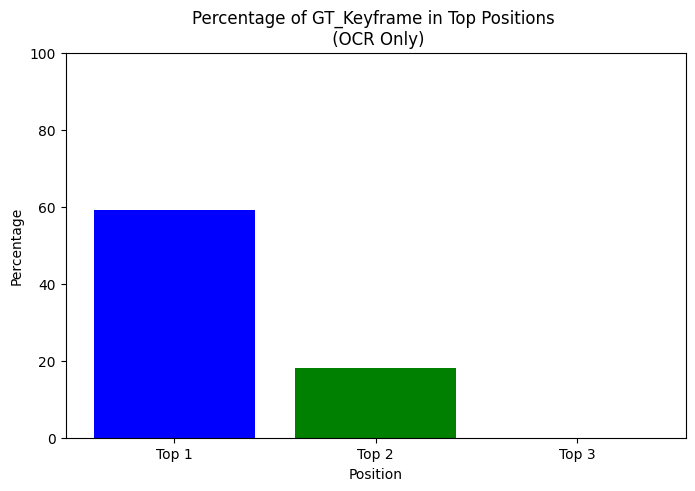

In [375]:
# call
calculate_and_plot_gt_keyframe_percentage(df_ocr_transcriptions)

In [376]:
df = df_ocr_transcriptions
res = []
for _, row in df.iterrows():
    logger.info(row['Prompt'])
    gt_keyframe = row['GT_Keyframe']
    prox = check_proximity_keyframes(gt_keyframe)
    res.append(prox)

prox_yes_no_ocr_transcriptions = []
for i, row in df.iterrows():
    if row['Top_1'] in res[i]:
        prox_yes_no_ocr_transcriptions.append(1)
    elif row['Top_2'] in res[i]:
        prox_yes_no_ocr_transcriptions.append(2)
    elif row['Top_3'] in res[i]:
        prox_yes_no_ocr_transcriptions.append(3)
    else:
        prox_yes_no_ocr_transcriptions.append(0)

print(prox_yes_no_ocr_transcriptions)

2024-07-14 17:54:41.975 | INFO     | __main__:<module>:4 - learning outcomes
2024-07-14 17:54:41.977 | INFO     | __main__:<module>:4 - What are the learning outcomes from the lecture?
2024-07-14 17:54:41.978 | INFO     | __main__:<module>:4 - What is the relation of protien and muscles?
2024-07-14 17:54:41.979 | INFO     | __main__:<module>:4 - Essential fatty acids
2024-07-14 17:54:41.980 | INFO     | __main__:<module>:4 - fish oil capsules
2024-07-14 17:54:41.982 | INFO     | __main__:<module>:4 - what is the functioning of fish oil capsules and its relation to vitamins
2024-07-14 17:54:41.983 | INFO     | __main__:<module>:4 - calcium as micronutrient
2024-07-14 17:54:41.985 | INFO     | __main__:<module>:4 - Explain where vitamins function as coenzymes
2024-07-14 17:54:41.986 | INFO     | __main__:<module>:4 - Give a list of food items where I can attain some important micronutrient
2024-07-14 17:54:41.989 | INFO     | __main__:<module>:4 - what is calcium commonly supplemented fo

[1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1]


In [377]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def total_top_3_percentage_plot_bar(data_1, data_2, data_3, data_4):
    def calculate_top_3_percentages(df):
        total = len(df)
        top_1_count = (df['GT_Keyframe'] == df['Top_1']).sum()
        top_2_count = (df['GT_Keyframe'] == df['Top_2']).sum()
        top_3_count = (df['GT_Keyframe'] == df['Top_3']).sum()

        top_1_percentage = (top_1_count / total) * 100
        top_2_percentage = (top_2_count / total) * 100
        top_3_percentage = (top_3_count / total) * 100

        return top_1_percentage, top_2_percentage, top_3_percentage

    # Convert data to DataFrames
    df1 = pd.DataFrame(data_1)
    df2 = pd.DataFrame(data_2)
    df3 = pd.DataFrame(data_3)
    df4 = pd.DataFrame(data_4)

    # Calculate percentages for each DataFrame
    percentages_1 = calculate_top_3_percentages(df1)
    percentages_2 = calculate_top_3_percentages(df2)
    percentages_3 = calculate_top_3_percentages(df3)
    percentages_4 = calculate_top_3_percentages(df4)

    total_1 = sum(percentages_1)
    total_2 = sum(percentages_2)
    total_3 = sum(percentages_3)
    total_4 = sum(percentages_4)

    # Data for plotting
    labels = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
    percentages_group1 = [total_1, total_2, total_3, total_4]
    percentages_group2 = [total_1 / 2, total_2 / 2, total_3 / 2, total_4 / 2]  # Example of a second metric

    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of the bars

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))

    bars1 = ax.bar(x - width / 2, percentages_group1, width, label='Group 1', color='blue')
    bars2 = ax.bar(x + width / 2, percentages_group2, width, label='Group 2', color='green')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percentage')
    ax.set_title('Total Percentage of GT Keyframe in Top 3 Positions')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    # Save the plot
    plt.savefig('total_top_3_percentage_plot_bar.png')
    # Show the plot
    plt.show()


[2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2]
[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 1, 3]
[1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1]
[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 2, 1, 0, 1, 1, 3]


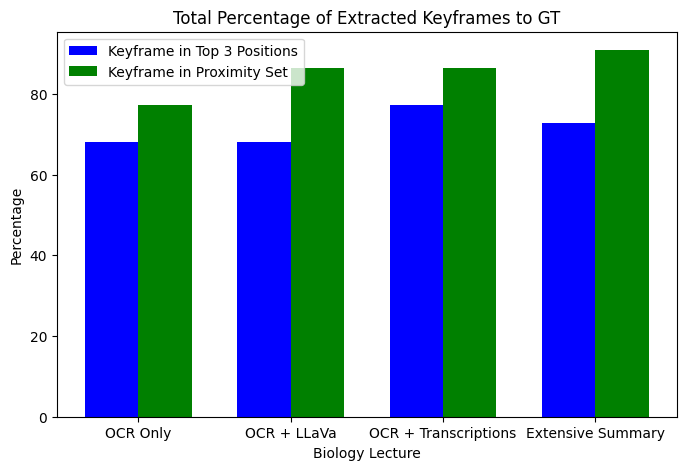

In [378]:
# call
print(prox_yes_no_ocr_only)
print(prox_yes_no_ocr_lava)
print(prox_yes_no_ocr_transcriptions)
print(prox_yes_no_long_summary)
total_top_3_percentage_plot(df_standard_ocr_only, df_ocr_lava, df_ocr_transcriptions, df_long_summary, prox_yes_no_ocr_only, prox_yes_no_ocr_lava, prox_yes_no_ocr_transcriptions, prox_yes_no_long_summary)